In [161]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [14]:
# set path 
path = "./statecrime.csv"
# read in the file
data = pd.read_csv(path)
# print 
data.head()

,state,violent,murder,hs_grad,poverty,single,white,urban
0,Alabama,459.9,7.1,82.1,17.5,29.0,70.0,48.65
1,Alaska,632.6,3.2,91.4,9.0,25.5,68.3,44.46
2,Arizona,423.2,5.5,84.2,16.5,25.7,80.0,80.07
3,Arkansas,530.3,6.3,82.4,18.8,26.3,78.4,39.54
4,California,473.4,5.4,80.6,14.2,27.8,62.7,89.73


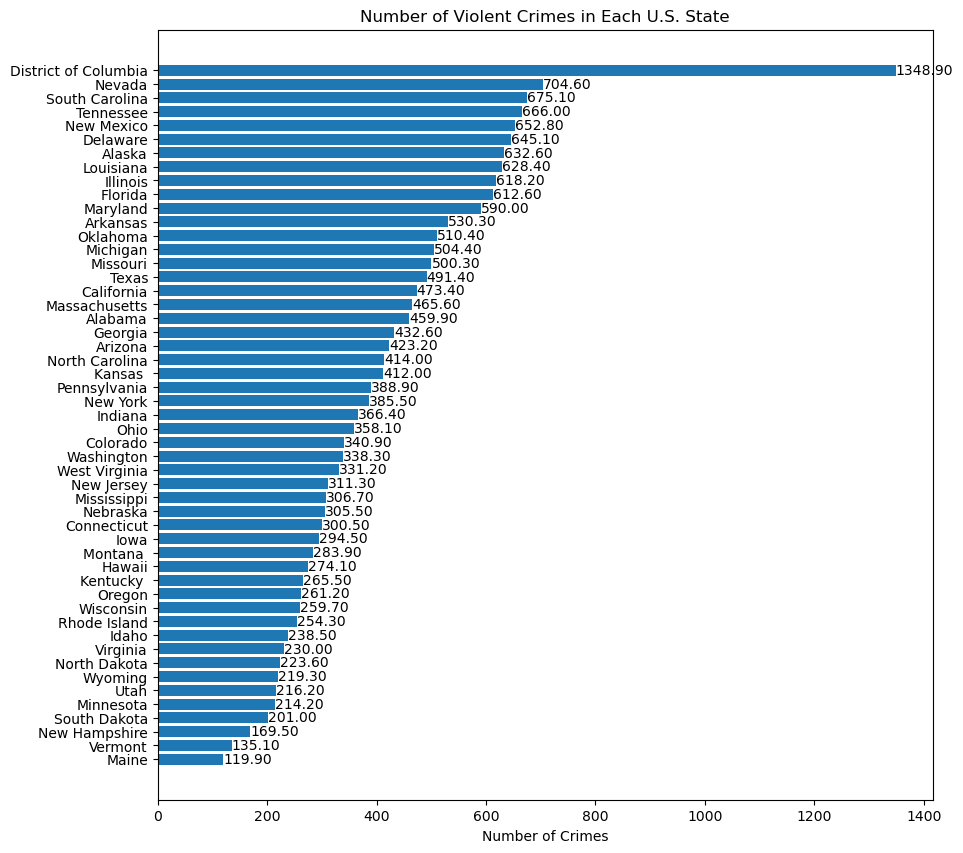

In [142]:
# see the violent crime by state
# first, arrange by violent crime
data_arr = data.sort_values("violent")

fig, ax = plt.subplots()

# create plot
hbars = ax.barh(data_arr.state, data_arr.violent)
# add labels to bars
ax.bar_label(hbars, fmt = "%.2f")
# set x-axis label and title
ax.set_xlabel("Number of Crimes")
ax.set_title("Number of Violent Crimes in Each U.S. State")

# print graph
plt.show()

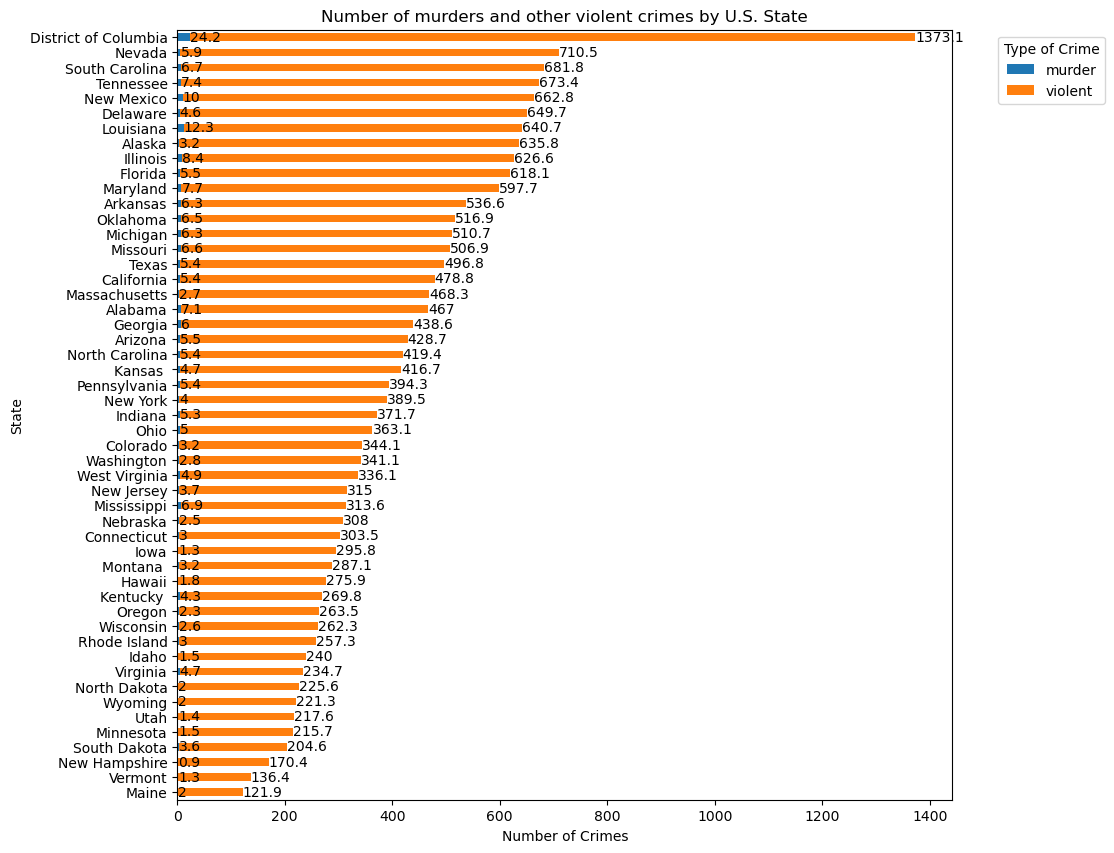

In [140]:
# graph violent crimes and murders by state and sort by the number of total crimes in state

#fig, crime_graph = plt.subplots()

# create the plot
crime_graph = data.sort_values(by = "murder", key = data["violent"].add).plot(y = ["murder", "violent"], x = "state", kind = "barh", stacked = True)
# set title
crime_graph.set_title("Number of murders and other violent crimes by U.S. State")
# set x- and y-axis labels
crime_graph.set_ylabel("State")
crime_graph.set_xlabel("Number of Crimes")
# set legend title and move the legend box
crime_graph.legend(title = "Type of Crime",  bbox_to_anchor=(1.05, 1),loc='upper left')
# add the numbers to bars
for c in crime_graph.containers:
    crime_graph.bar_label(c)

# print plot
plt.show()

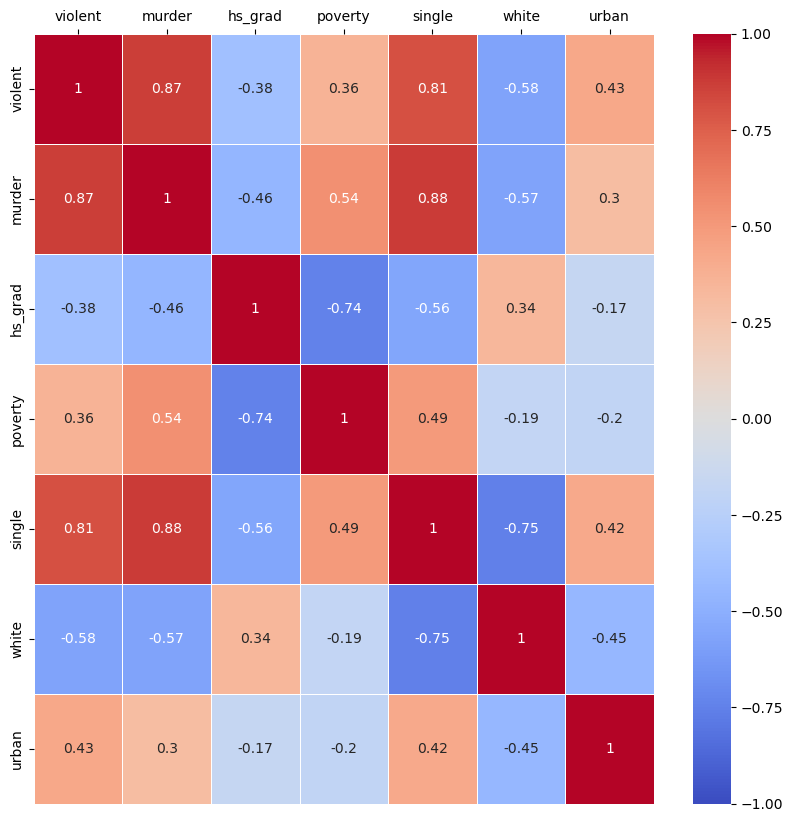

In [157]:
# see if there are any correlations between the variables

# run a correlaton
crime_corr = data[['violent','murder','hs_grad','poverty','single', 'white','urban']].corr(method = "pearson")

# create a heatmap of correlation
crime_heatmap = sns.heatmap(crime_corr,
            vmin = -1,
            vmax = 1,
            xticklabels = crime_corr.columns,
            yticklabels = crime_corr.columns,
            cmap = "coolwarm",
            annot = True,
            linewidth = 0.5)

# move x-axis labels to top
crime_heatmap.xaxis.tick_top()

# print plot
plt.show()

In [163]:
# run a regression to see if poverty predicts murder rate
murder_pov_model = smf.ols(formula = "murder ~ poverty",
                              data = data).fit()
# print result
print(murder_pov_model.summary())

# The level of poverty in a state significantly predicts 
# the number of murders in that state - Greater poverty leads
# to a larger number of murders. Poverty explains 29% of
# variation in murder rates across the states.

                            OLS Regression Results                            
Dep. Variable:                 murder   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     20.36
Date:                Fri, 13 Jun 2025   Prob (F-statistic):           4.03e-05
Time:                        10:30:26   Log-Likelihood:                -128.98
No. Observations:                  51   AIC:                             262.0
Df Residuals:                      49   BIC:                             265.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.8989      1.998     -1.952      0.0

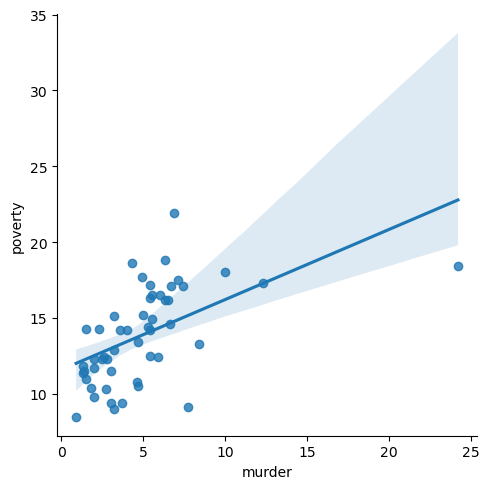

In [168]:
# graph the plot
murder_pov_plot = sns.lmplot(x = "murder", y = "poverty", data = data[["murder", "poverty"]])

# print the plot
plt.show()

In [160]:
# run a regression to see if poverty predicts murder rate
murder_pov_urb_model = smf.ols(formula = "murder ~ poverty+urban",
                              data = data).fit()
# print result
print(murder_pov_urb_model.summary())

# Both the level of poverty in a state and the percent of urban population
# significantly predict the number of murders occuring in that state.
# Greater poverty and greater urban population in the state both 
# independently predict greater murder rate. Together, these two variables
# explain 46% of variation in murder rates across the states.

                            OLS Regression Results                            
Dep. Variable:                 murder   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     20.68
Date:                Fri, 13 Jun 2025   Prob (F-statistic):           3.33e-07
Time:                        10:24:45   Log-Likelihood:                -121.99
No. Observations:                  51   AIC:                             250.0
Df Residuals:                      48   BIC:                             255.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.6894      2.305     -4.203      0.0

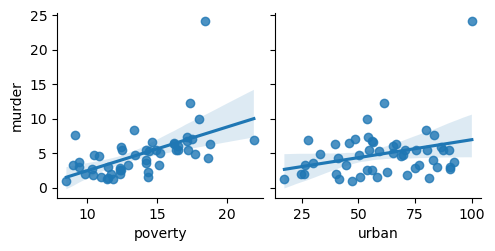

In [171]:
# create a plot
murder_pov_urb_plot = sns.pairplot(data, x_vars = ["poverty", "urban"], y_vars = ["murder"],
            kind = "reg")

# print the plot
plt.show()